<a href="https://colab.research.google.com/github/AirPro/DeepLearningFinalProject/blob/main/Freidrd_Deep_Learning_Final_Projecct_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robert Freid Deep Learning Final Project Assignment #
We are implementing classification models for the CIFAR10 small images dataset. <br> This dataset contains 50,000 32 x 32 color training images and 10,000 test images. <br> There are 10 Labeled Catagories. <br> The dataset is already built in Keras and we will import the data using the method described in class. 



In [1]:
# Import Statements
import tensorflow as tf

# Display the tensorflow version
print("tensorflow version: ", tf.__version__)

tensorflow version:  2.12.0


In [2]:
from tensorflow import keras

In [3]:
# Additional Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model

# Loading the CIFAR10 Dataset

In [4]:
# Loading the CIFAR10 dataset
Cifar10=keras.datasets.cifar10 

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## Visualize a sample of the images from the CIFAR10 datasets

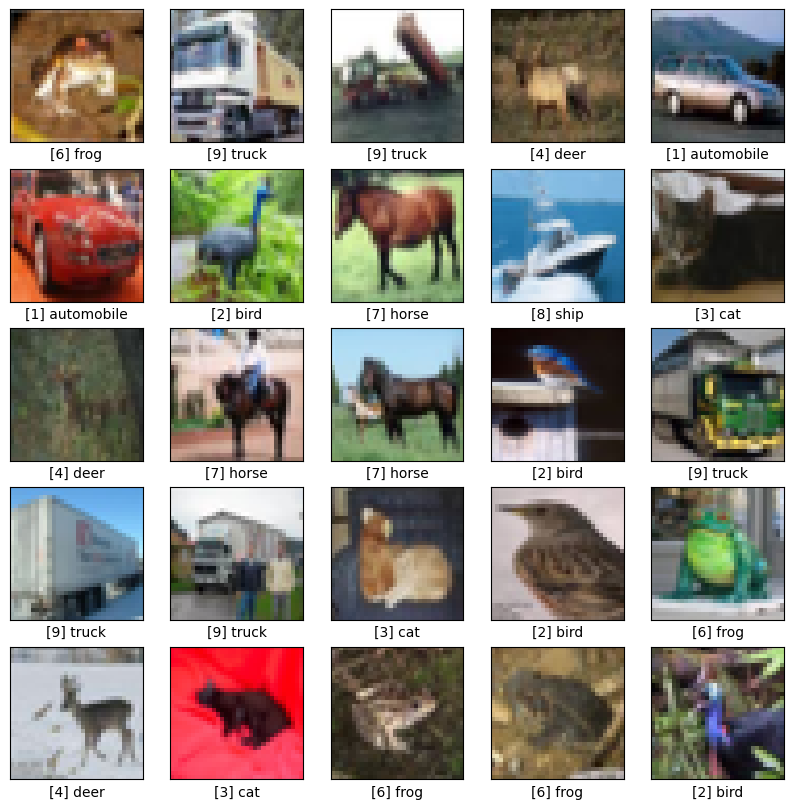

In [6]:
# Create an array of class names for the categories.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# display the first 25 images from training set

plt.figure(figsize=(10,10))
for i in range(25):           # 25 images
  plt.subplot(5,5,i+1)       # matrix of 5 x 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary) # printing binary black and white image
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]])) # Assigning name to each image
plt.show()

# Data Preparation
## Scaling the Image Values

The pixel value per image falls between 0 and 255. <br>
We need to scale the values so they fall between 0 and 1 by dividing by 255. <br>
This needs to be applied to both X_train and X_test

In [7]:
X_train = X_train/255
print("Display the scaled shape of X_train ", X_train.shape)

X_test = X_test/255
print("Display the scaled shape of X_test ", X_test.shape)

Display the scaled shape of X_train  (50000, 32, 32, 3)
Display the scaled shape of X_test  (10000, 32, 32, 3)


## One Hot Encoding of the Labels
### Special Conditions
This is not required in a two-class classificaation Examination <br>
This is required in a multi-class classification Examination <br>
We have a 10 class classification Examination Dataset <br>
After One Hot Encoding is Applied, We Retain 10 Columns  


In [8]:
# Prior toOne Hot Encoding
print("Prior to One Hot Encoding")
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train))
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test))

# Apply One Hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Display after applying One Hot Encoding
print("After One Hot Encoding")
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train[0]))
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test[1]))

Prior to One Hot Encoding
y_train Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
y_test Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
After One Hot Encoding
y_train Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_test Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Modeling - Model Notes for Convolutional Neural Networks
Keras employs two methodologies for programming CNN's <br>
First Method: Sequential, Adding layers in a sequence <br>
Second Methiod: Modular Approach, this methodnis more dynamic, customizable, molded, and easy to explore. <br>
In this exercise both approaches are equally effective. 
## Building the Model

In [9]:
# Create a sequential model that is an empty neural network with no layers in it.
model = models.Sequential()

### One, Two, and Three Block BASELINE MODEL
Stacking Convolutional Layers followed by a Max Pooling Layer. <br>
Each block is increased in order by 32, 64, 128, and 256 with Padding. <br>
Each layer uses a ReLU activation function and the He weight initialization.

In [12]:
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

We must then Flatten the model. <br>
OPutput must have 10 nodes for the 10 classes

In [18]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## Compile the model

In [19]:
# import SGD
from keras.optimizers import SGD
# use the modest learning rate of 0.001, large momentum of 0.9, categorical cross entropy loss function
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Network on the Training Data

In [20]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 502s 320ms/step - loss: 2.0431 - accuracy: 0.2111 - val_loss: 1.8899 - val_accuracy: 0.2453
Epoch 2/20
1563/1563 [==============================] - 500s 320ms/step - loss: 1.8127 - accuracy: 0.2814 - val_loss: 1.7103 - val_accuracy: 0.3247
Epoch 3/20
1563/1563 [==============================] - 479s 307ms/step - loss: 1.6704 - accuracy: 0.3396 - val_loss: 1.6210 - val_accuracy: 0.3763
Epoch 4/20
1563/1563 [==============================] - 473s 303ms/step - loss: 1.5759 - accuracy: 0.3850 - val_loss: 1.6033 - val_accuracy: 0.3933
Epoch 5/20
1563/1563 [==============================] - 476s 304ms/step - loss: 1.4886 - accuracy: 0.4239 - val_loss: 1.4866 - val_accuracy: 0.4373
Epoch 6/20
1563/1563 [==============================] - 460s 295ms/step - loss: 1.3998 - accuracy: 0.4699 - val_loss: 1.4563 - val_accuracy: 0.4539
Epoch 7/20
1563/1563 [==============================] - 483s 309ms/step - loss: 1.3229 - accuracy: 0.5077 - val_

## Evaluation of the model

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("accuracy: ", test_acc)

313/313 [==============================] - 24s 76ms/step - loss: 1.2769 - accuracy: 0.6442
accuracy:  0.6442000269889832


## Observation: Pretty good accuracy

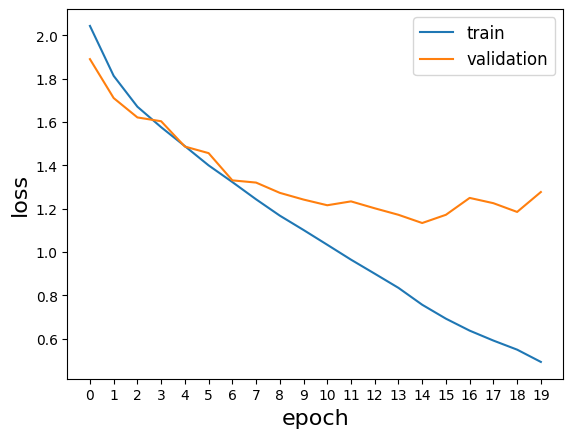

In [29]:
epochs_num = 20
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right', fontsize='large')
plt.ylabel('loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.yticks()
plt.xticks(np.arange(0, epochs_num))
plt.show()

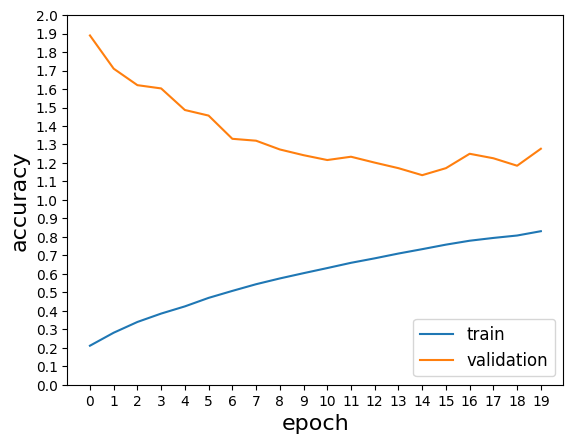

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.yticks(np.arange(0.0,2.05,0.1))#, step=0.5))
plt.xticks(np.arange(0, epochs_num))
plt.legend(['train', 'validation'], loc='lower right', fontsize='large')
plt.show()

In [37]:
pred_test = model.predict(X_test)

decoded_y_test= tf.argmax(y_test, axis=1)
decoded_prediction = tf.argmax(pred_test, axis=1)

print('decoded_y_test Shape:', decoded_y_test.shape)
print('decoded_prediction Shape:', decoded_prediction.shape)

313/313 [==============================] - 25s 79ms/step
decoded_y_test Shape: (10000,)
decoded_prediction Shape: (10000,)


In [41]:
tf.math.confusion_matrix(decoded_y_test, decoded_prediction)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[626,  45, 127,  40,  11,   6,   6,   4,  81,  54],
       [ 10, 746,   5,  14,   2,   1,   1,   5,  16, 200],
       [ 64,   5, 435, 196,  83,  97,  80,  21,   5,  14],
       [ 18,   5,  68, 351,  37, 388,  44,  59,   3,  27],
       [ 20,   6,  78, 108, 554, 100,  25, 101,   1,   7],
       [  7,   2,  18, 160,  22, 639,  12, 131,   0,   9],
       [ 11,   2,  45, 125,  19,  48, 732,   8,   1,   9],
       [  6,   2,   8,  40,  26,  85,   2, 808,   0,  23],
       [ 84,  84,  13,  12,   1,   6,   0,   3, 765,  32],
       [ 19,  84,   8,  30,   5,   5,   1,  58,   4, 786]], dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix')

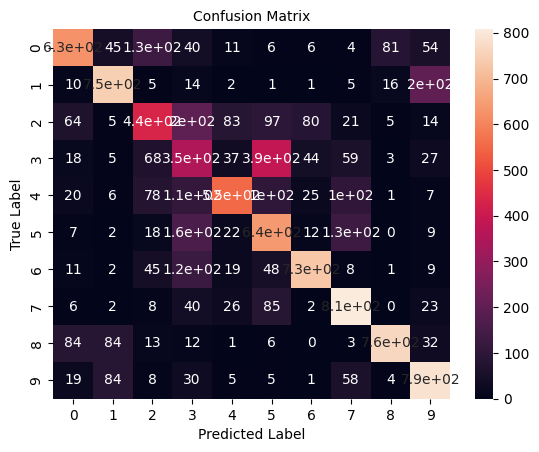

In [42]:
# imports for seaborn confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(decoded_y_test, decoded_prediction)

sn.heatmap(cm,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=10)